In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

import torch.nn as nn
import importlib

In [2]:
import koopomics as ko
import pandas as pd

In [3]:
# Load Dataset
pregnancy_df = pd.read_csv('/Users/daviddornig/Documents/Master_Thesis/Bioinf/Code/philipp-trinh/KOOPOMICS/input_data/pregnancy/pregnancy_interpolated_264M_robust_minmax_scaled_outlrem_uniform.csv')

condition_id = 'Condition'
time_id = 'Gestational age (GA)/weeks'
replicate_id = 'Subject ID'
feature_list = pregnancy_df.columns[7:]
num_features = len(feature_list)

train_set_df = pregnancy_df[pregnancy_df['Cohort'] == 'Discovery'].copy()
test_set_df = pregnancy_df[pregnancy_df['Cohort'] == 'Validation (Test Set 1)'].copy()
train_dataloader = ko.OmicsDataloader(train_set_df, feature_list, replicate_id, time_id, 
                                      batch_size=5, max_Ksteps = 10)
test_dataloader = ko.OmicsDataloader(test_set_df, feature_list, replicate_id, time_id, 
                                     batch_size=5, max_Ksteps = 10)


In [6]:
embedding_model = ko.FF_AE([264,2000,2000,100], [100,2000,2000,264],E_dropout_rates= [0,0,0,0],activation_fn='leaky_relu')
#operator_model = ko.LinearizingKoop(linearizer=ko.FFLinearizer([3,1000,10], [10,1000,3], linE_dropout_rates=[0,0,0]), koop=ko.InvKoop(latent_dim=10, reg='skewsym'))
operator_model = ko.InvKoop(latent_dim=100, reg='nondelay')

TestingKoopnondelay = ko.KoopmanModel(embedding=embedding_model, operator=operator_model)
# Load Model Parameters
param_path = '/Users/daviddornig/Documents/Master_Thesis/Bioinf/Code/philipp-trinh/KOOPOMICS/TestingKoop264M_tanh_nondelay.pth'
TestingKoopnondelay.load_state_dict(torch.load(param_path,  map_location=torch.device('cpu')))

Model loaded with:
FF_AE module
InvKoop module
An invertible Koop


<All keys matched successfully>

In [7]:
TestingKoopnondelay

KoopmanModel(
  (embedding): FF_AE(
    (encode): Sequential(
      (0): Linear(in_features=264, out_features=2000, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=2000, out_features=2000, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=2000, out_features=100, bias=True)
    )
    (decode): Sequential(
      (0): Linear(in_features=100, out_features=2000, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=2000, out_features=2000, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Linear(in_features=2000, out_features=264, bias=True)
    )
  )
  (operator): InvKoop(
    (nondelay_fwd): dynamicsC(
      (dynamics): Linear(in_features=100, out_features=100, bias=False)
      (fixed): Linear(in_features=100, out_features=99, bias=False)
      (flexi): Linear(in_features=100, out_features=1, bias=False)
    )
    (nondelay_bwd): dynamics_backD(
      (dynamics): Linear(in_featu

In [19]:
def recursive_reload():
    import importlib
    import sys
    
    importlib.reload(ko.training.data_loader)
    importlib.reload(ko.training.train_utils)
    importlib.reload(ko.test.test_utils)
    importlib.reload(ko.model.build_nn_functions)
    importlib.reload(ko.model.embeddingANN)
    importlib.reload(ko.model.koopmanANN)
    importlib.reload(ko.model.model_loader)
    
    importlib.reload(ko.all_functions)
    
    importlib.reload(ko)



In [21]:
recursive_reload()

In [22]:

# Run training loop
ko.train(TestingKoopnondelay, train_dataloader, test_dataloader,
         lr= 0.001, learning_rate_change=0.8, loss_weights=[1,1,1,1,0.001,0],
         num_epochs=300, decayEpochs=[3, 6, 9, 12, 15, 18, 21, 24, 27],
         weight_decay=0, gradclip=1, max_Kstep=10, mask_value=-2,
         print_batch_info=False, model_name='TestingKoop264M_tanh_nondelay')


Using the CPU
----------Training epoch--------
----------------0---------------
hello4
Training interrupted. Saving model...


In [10]:
TestingKoopnondelay.operator.nondelay_bwd.flexi.weight.data

tensor([[ 0.0087,  0.0017,  0.0235,  0.0626,  0.0451,  0.0521,  0.0362,  0.0464,
          0.0341,  0.0425,  0.0312,  0.0136,  0.0198,  0.0482,  0.0175,  0.0156,
          0.0417,  0.0482, -0.0024,  0.0040,  0.0187,  0.0178, -0.0108, -0.0372,
         -0.0267, -0.0350, -0.0577, -0.0453, -0.0293, -0.0364, -0.0401, -0.0463,
         -0.0220,  0.0086, -0.0086, -0.0151,  0.0251, -0.0077, -0.0164, -0.0137,
          0.0146, -0.0100, -0.0180, -0.0033,  0.0193, -0.0125, -0.0325, -0.0011,
          0.0088, -0.0161, -0.0291, -0.0152,  0.0097, -0.0092, -0.0321, -0.0174,
         -0.0260, -0.0367, -0.0357, -0.0079, -0.0095, -0.0051, -0.0092, -0.0050,
         -0.0080,  0.0248,  0.0224,  0.0144,  0.0250,  0.0266,  0.0175,  0.0036,
         -0.0103, -0.0167, -0.0269, -0.0286, -0.0070,  0.0088, -0.0321, -0.0016,
          0.0339,  0.0248, -0.0070,  0.0189, -0.0053, -0.0060, -0.0139, -0.0083,
         -0.0306, -0.0073, -0.0106, -0.0385, -0.0277, -0.0190, -0.0148, -0.0216,
         -0.0193, -0.0290, -

In [12]:
bwdmatrix,fwdmatrix = TestingKoop.kmatrix()
bwdM = bwdmatrix.detach()
fwdM = fwdmatrix.detach()
#fwdinv = np.linalg.inv(fwdM)

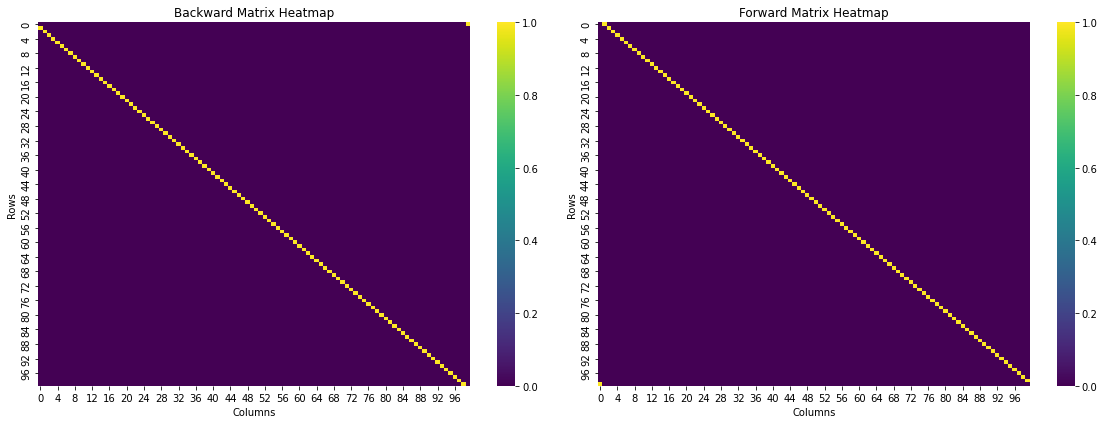

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# First heatmap (for bwdM)
sns.heatmap(bwdM, annot=False, fmt=".2f", cmap='viridis', ax=ax1)
ax1.set_title('Backward Matrix Heatmap')
ax1.set_xlabel('Columns')
ax1.set_ylabel('Rows')

# Second heatmap (for fwdM)
sns.heatmap(fwdM, annot=False, fmt=".2f", cmap='viridis', ax=ax2)
ax2.set_title('Forward Matrix Heatmap')
ax2.set_xlabel('Columns')
ax2.set_ylabel('Rows')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the subplots
plt.show()


In [13]:
nondelay = mo.koopmanANN.dynamicsC(10)

In [14]:
nondelay.fixed.weight.data

tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [15]:
nondelay.flexi.weight.data

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
import torch.nn.init as init

init.normal_(nondelay.flexi.weight) 


In [ ]:
torch.cat((nondelay.fixed.weight.data, nondelay.flexi.weight.data),0)